# 1. Importing the data

In [6]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [7]:
loan_data = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\Biplab.Ghosal\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
Unnamed: 0                     466285 non-null int64
id                             466285 non-null int64
member_id                      466285 non-null int64
loan_amnt                      466285 non-null int64
funded_amnt                    466285 non-null int64
funded_amnt_inv                466285 non-null float64
term                           466285 non-null object
int_rate                       466285 non-null float64
installment                    466285 non-null float64
grade                          466285 non-null object
sub_grade                      466285 non-null object
emp_title                      438697 non-null object
emp_length                     445277 non-null object
home_ownership                 466285 non-null object
annual_inc                     466281 non-null float64
verification_status            466285 non-null object
issue_d                   

In [9]:
loan_data.sample(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
55440,55440,9045617,10857696,12000,12000,12000.0,36 months,20.20,447.19,D,D5,ELEVATOR TECHNICIAN,10+ years,MORTGAGE,180000.0,Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=9045617,NaN,debt_consolidation,LOAN,956xx,CA,8.49,1.0,May-97,4.0,5.0,NaN,7.0,0.0,3466,68.0,23.0,f,4822.76,4822.76,10769.91,10769.91,7177.24,3592.67,0.0,0.0,0.0,Jan-16,447.19,Jan-16,Jan-16,0.0,36.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,1551.0,685534.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5100.0,NaN,NaN,NaN
115744,115744,6179968,2432169,6400,6400,6400.0,36 months,21.15,241.62,E,E2,City of Stamford,< 1 year,RENT,60000.0,Source Verified,Jul-13,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=6179968,NaN,moving,Moving and relocation,069xx,CT,26.30,3.0,Dec-77,4.0,4.0,NaN,17.0,0.0,7876,45.5,43.0,w,0.00,0.00,3141.06,3141.06,1863.72,1277.34,0.0,0.0,0.0,Aug-14,241.62,NaN,Jan-16,0.0,4.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,52301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17300.0,NaN,NaN,NaN
309085,309085,26860266,29343202,6000,6000,6000.0,36 months,6.49,183.87,A,A2,night security,10+ years,RENT,28000.0,Not Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=26860266,NaN,debt_consolidation,Debt consolidation,129xx,NY,17.92,0.0,Mar-04,0.0,NaN,NaN,11.0,0.0,8660,56.6,26.0,w,3476.48,3476.48,2941.92,2941.92,2523.52,418.40,0.0,0.0,0.0,Jan-16,183.87,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,11062.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15300.0,NaN,NaN,NaN


In [10]:
loan_data.shape

(466285, 75)

# 2. Processing the Target Variable

In [11]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [12]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 'Bad Loan', 'Good Loan')
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

In [13]:
loan_data['good_bad'].value_counts()

Good Loan    415317
Bad Loan      50968
Name: good_bad, dtype: int64

In [14]:
loan_data.drop(['loan_status'],axis=1,inplace=True)

# 3. Limiting Feature Space

The full dataset has 150 features for each loan. We'll select features in two steps:

Drop features with more than 30% of their data missing.
Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan.

## 3.1 Drop features missing more than 30% data

In [15]:
missing_fractions = loan_data.isnull().mean().sort_values(ascending=False)
missing_fractions.head(10)

annual_inc_joint             1.0
verification_status_joint    1.0
open_acc_6m                  1.0
open_il_6m                   1.0
open_il_12m                  1.0
open_il_24m                  1.0
mths_since_rcnt_il           1.0
total_bal_il                 1.0
il_util                      1.0
open_rv_12m                  1.0
dtype: float64

In [16]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)

['all_util', 'annual_inc_joint', 'desc', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'next_pymnt_d', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'total_bal_il', 'total_cu_tl', 'verification_status_joint']


In [17]:
len(drop_list)

22

In [18]:
loan_data.drop(labels=drop_list, axis=1, inplace=True)
loan_data.shape

(466285, 53)

## 3.2 Only keep loan features known to potential investors

In [19]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 
             'grade', 'home_ownership', 'initial_list_status', 'installment', 'fico_range_low','fico_range_high',
             'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'open_acc', 'pub_rec',  
             'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'total_acc', 'verification_status',
             'funded_amnt','delinq_2yrs','inq_last_6mths','good_bad','acc_now_delinq','total_rev_hi_lim',
             'mths_since_last_delinq','mths_since_last_record']

In [20]:
drop_list = [col for col in loan_data.columns if col not in keep_list]
print(drop_list)

['Unnamed: 0', 'id', 'member_id', 'funded_amnt_inv', 'emp_title', 'pymnt_plan', 'url', 'title', 'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'tot_coll_amt', 'tot_cur_bal']


In [21]:
loan_data.drop(labels=drop_list, axis=1, inplace=True)

In [22]:
loan_data.shape

(466285, 28)

# 4. Data Preprocessing & Exploratory Data Analysis

We'll inspect each feature individually, and do the following:

- Drop the feature if it is not useful for predicting the loan status.
- View summary statistics and visualize the data, plotting against the loan status.
- Modify the feature to make it useful for modeling, if necessary.

We define a function for plotting a variable and comparing with the loan status:

In [23]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loan_data.loc[loan_data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loan_data[col_name], order=sorted(loan_data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='good_bad', data=loan_data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loan_data.groupby(col_name)['good_bad'].value_counts(normalize=True).loc[:,'Good Loan']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Good Loans')
        ax2.set_title('Good Loan Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

In [24]:
loan_data.sample(2)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,acc_now_delinq,total_rev_hi_lim,good_bad
311587,24000,24000,36 months,17.57,862.49,D,D4,5 years,RENT,150000.0,Source Verified,Sep-14,major_purchase,VA,10.06,0.0,Oct-08,1.0,5.0,0.0,34573,86.4,5.0,f,INDIVIDUAL,0.0,40000.0,Good Loan
73256,30000,30000,36 months,19.20,1102.72,D,D3,7 years,RENT,72000.0,Source Verified,Oct-13,debt_consolidation,CA,15.32,0.0,Jul-02,1.0,9.0,0.0,28516,87.5,19.0,w,INDIVIDUAL,0.0,32600.0,Good Loan


## 4.1 loan_amnt 

In [25]:
loan_data['loan_amnt'].describe()

count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [26]:
loan_data['loan_amnt'].isnull().sum()

0

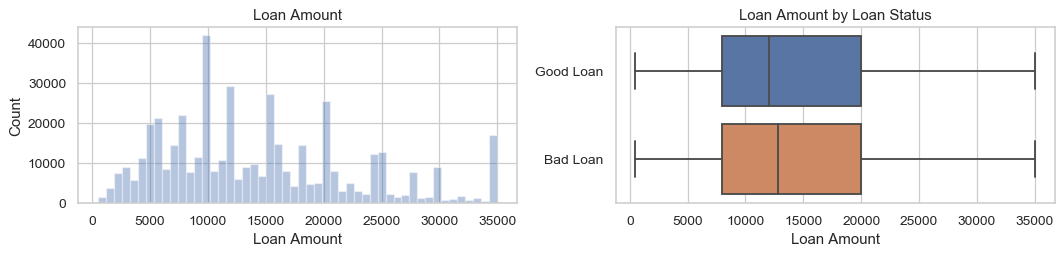

In [27]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

## 4.2 funded_amnt

In [28]:
loan_data['funded_amnt'].describe()

count    466285.000000
mean      14291.801044
std        8274.371300
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

In [29]:
loan_data['funded_amnt'].isnull().sum()

0

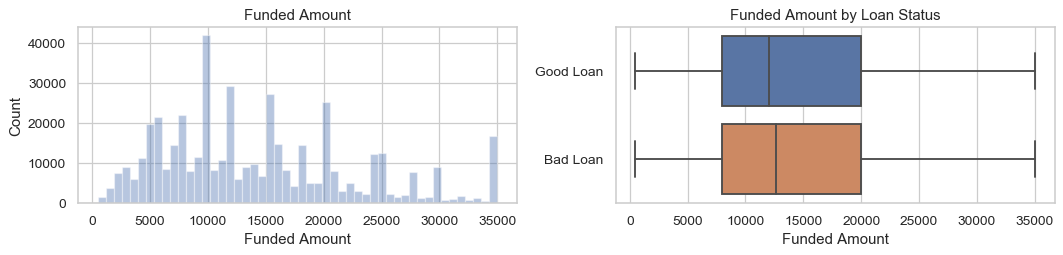

In [30]:
plot_var('funded_amnt', 'Funded Amount', continuous=True)

## 4.3 term

In [31]:
loan_data['term'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
type(loan_data['term'][0])

numpy.int64

In [32]:
loan_data['term'].isnull().sum()

0

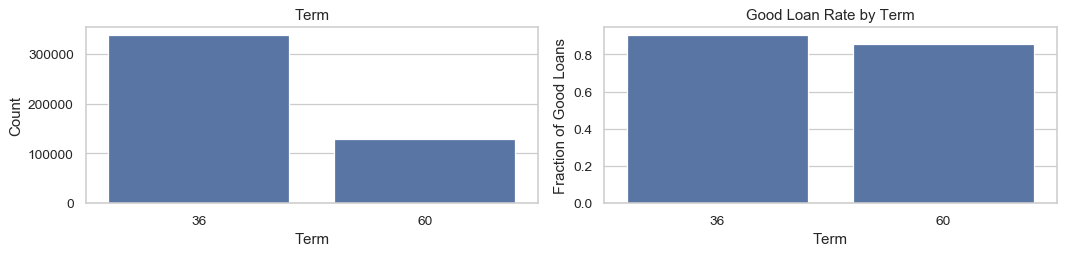

In [33]:
plot_var('term','Term',continuous=False)

## 4.4 int_rate

In [34]:
loan_data['int_rate'].describe()

count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64

In [35]:
loan_data['int_rate'].isnull().sum()

0

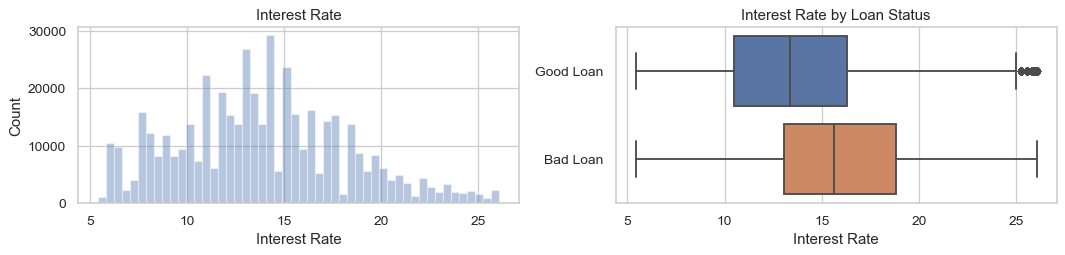

In [36]:
plot_var('int_rate', 'Interest Rate', continuous=True)

## 4.5 installment

In [37]:
loan_data['installment'].describe()

count    466285.000000
mean        432.061201
std         243.485550
min          15.670000
25%         256.690000
50%         379.890000
75%         566.580000
max        1409.990000
Name: installment, dtype: float64

In [38]:
loan_data['installment'].isnull().sum()

0

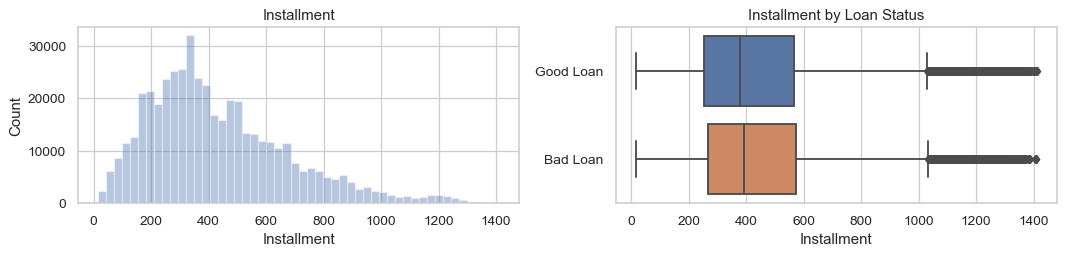

In [39]:
plot_var('installment', 'Installment', continuous=True)

## 4.6 grade

In [40]:
loan_data['grade'].value_counts()

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

In [41]:
loan_data['grade'].isnull().sum()

0

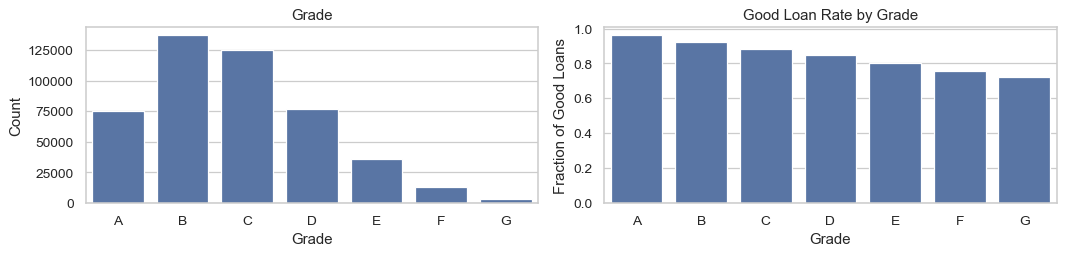

In [42]:
plot_var('grade', 'Grade', continuous=False)

## 4.7 sub_grade

In [43]:
loan_data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [44]:
loan_data['sub_grade'].isnull().sum()

0

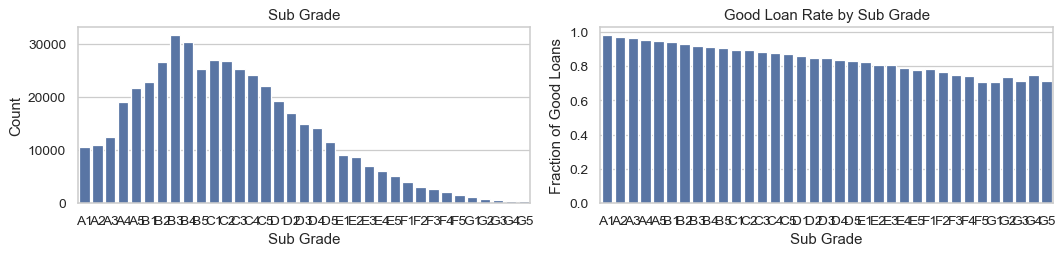

In [45]:
plot_var('sub_grade', 'Sub Grade', continuous=False)

Sub Grade is clearly implied from Grade. So dropping Sub Grade column

In [46]:
loan_data.drop('sub_grade', axis=1, inplace=True)

## 4.8 emp_length

In [47]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace('n/a',  str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')

loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'])

In [48]:
loan_data['emp_length'].describe()

count    445277.000000
mean          5.993330
std           3.627044
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64

In [49]:
loan_data['emp_length'].isnull().sum()

21008

In [50]:
loan_data['emp_length'].fillna(0, inplace=True)

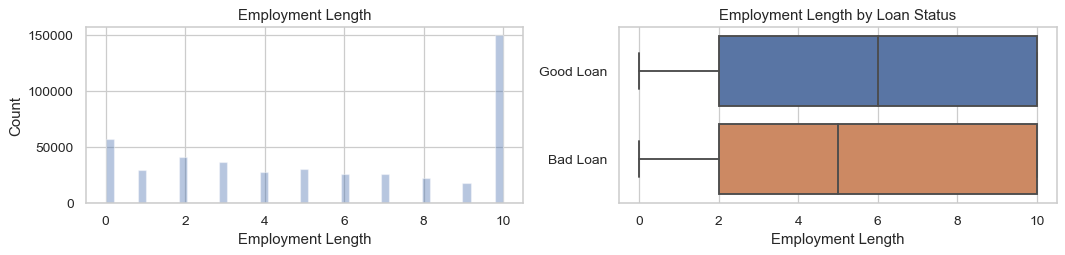

In [51]:
plot_var('emp_length', 'Employment Length', continuous=True)

## 4.9 home_ownership

In [52]:
loan_data['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

In [53]:
loan_data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [54]:
loan_data['home_ownership'].isnull().sum()

0

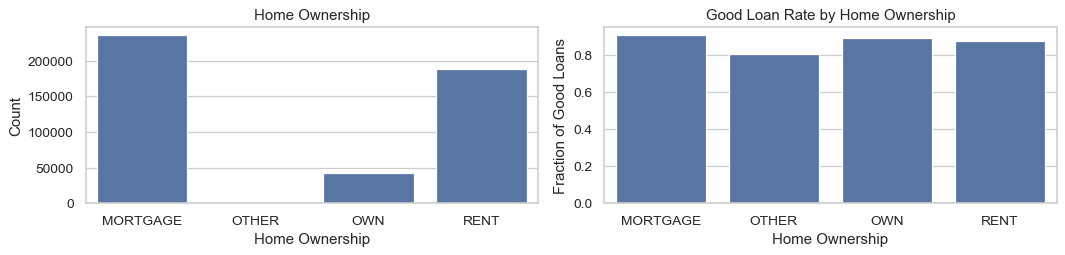

In [55]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

## 4.10 annual_inc

In [56]:
loan_data['annual_inc'].describe()

count    4.662810e+05
mean     7.327738e+04
std      5.496357e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.896000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [57]:
loan_data['annual_inc'].isnull().sum()

4

In [58]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].median(), inplace=True)

In [59]:
loan_data['annual_inc'] = loan_data['annual_inc'].apply(lambda x: np.log10(x+1))

In [60]:
loan_data['annual_inc'].describe()

count    466285.000000
mean          4.802121
std           0.226541
min           3.278067
25%           4.653222
50%           4.799347
75%           4.949165
max           6.875061
Name: annual_inc, dtype: float64

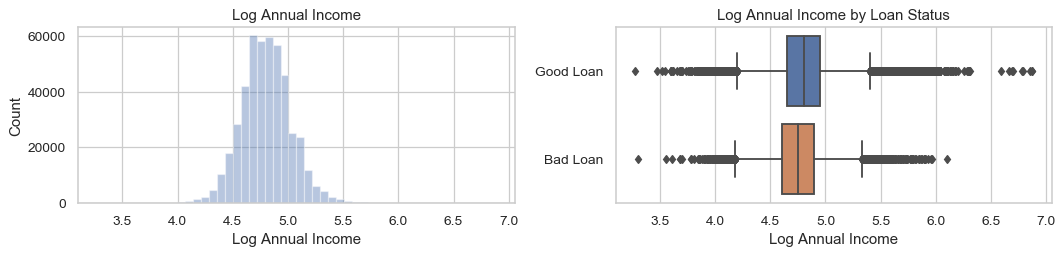

In [61]:
plot_var('annual_inc', 'Log Annual Income', continuous=True)

## 4.11 verification_status

In [62]:
loan_data['verification_status'].value_counts()

Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64

In [63]:
loan_data['verification_status'].isnull().sum()

0

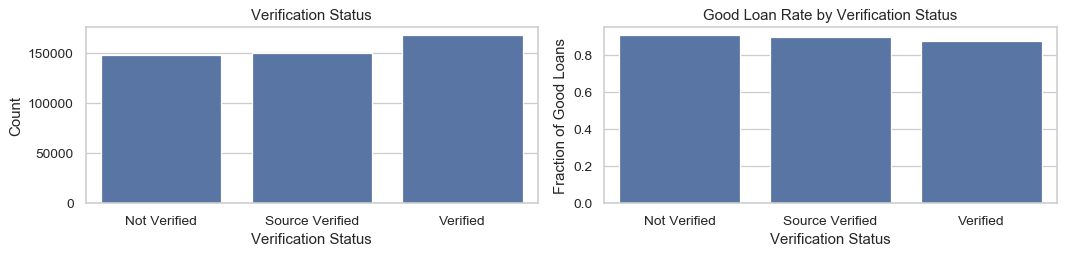

In [64]:
plot_var('verification_status', 'Verification Status', continuous=False)

## 4.12 issue_d

Data Dictionary: "The month which the loan was funded."

Because we're only using variables available to investors before the loan was funded, issue_d will not be included in the final model. 
Dropping issue_d column

In [65]:
loan_data.drop(['issue_d'],axis=1,inplace=True)

## 4.13 purpose

In [66]:
loan_data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [67]:
loan_data['purpose'].isnull().sum()

0

## 4.14 addr_state

In [68]:
loan_data['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [69]:
loan_data['addr_state'].isnull().sum()

0

## 4.15 dti

In [70]:
loan_data['dti'].describe()

count    466285.000000
mean         17.218758
std           7.851121
min           0.000000
25%          11.360000
50%          16.870000
75%          22.780000
max          39.990000
Name: dti, dtype: float64

In [71]:
loan_data['dti'].isnull().sum()

0

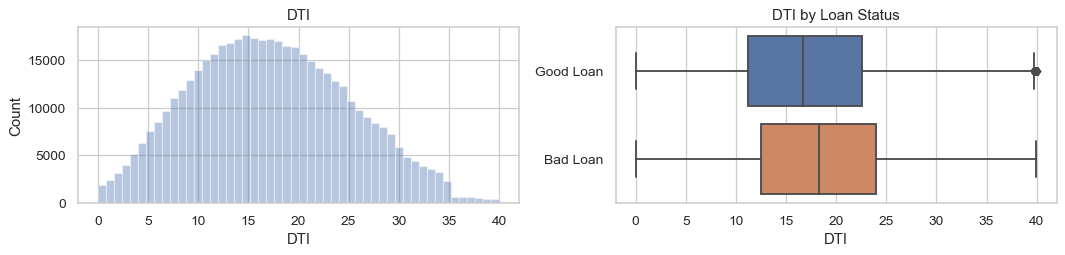

In [72]:
plot_var('dti', 'DTI', continuous=True)

## 4.16 delinq_2yrs

In [73]:
loan_data['delinq_2yrs'].describe()

count    466256.000000
mean          0.284678
std           0.797365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

In [74]:
loan_data['delinq_2yrs'].isnull().sum()

29

In [75]:
loan_data['delinq_2yrs'].fillna(loan_data['delinq_2yrs'].mode(), inplace=True)

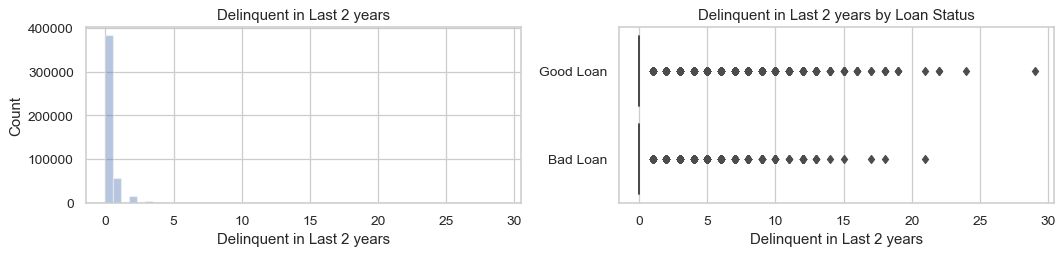

In [76]:
plot_var('delinq_2yrs', 'Delinquent in Last 2 years', continuous=True)

No Variance in data for pub_rec column. Hence this column can be dropped

In [77]:
loan_data.drop(['delinq_2yrs'],axis=1,inplace=True)

## 4.17 earliest_cr_line

In [78]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
loan_data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [79]:
# Assume we are now in January 2020
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2020-01-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# Calculate the difference between two dates in months, turn it to numeric datatype and round it.

In [80]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        264.482430
std          93.974829
min        -587.000000
25%         208.000000
50%         250.000000
75%         310.000000
max         612.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [81]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]
# We take three columns from the dataframe. Then, we display them only for the rows where a variable has negative value.
# There are 2303 strange negative values.

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-512.0
1770,Sep-68,2068-09-01,-584.0
2799,Sep-64,2064-09-01,-536.0
3282,Sep-67,2067-09-01,-572.0
3359,Feb-65,2065-02-01,-541.0
3413,Jun-67,2067-06-01,-569.0
3607,Aug-67,2067-08-01,-571.0
3989,Dec-63,2063-12-01,-527.0
4440,Sep-68,2068-09-01,-584.0
4449,Sep-68,2068-09-01,-584.0


In [82]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

C:\Users\Biplab.Ghosal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
loan_data.drop(['earliest_cr_line','earliest_cr_line_date'],axis=1,inplace=True)

In [84]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        267.385374
std          86.460310
min          98.000000
25%         209.000000
50%         251.000000
75%         310.000000
max         612.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [85]:
loan_data['mths_since_earliest_cr_line'].isnull().sum()

29

In [86]:
loan_data['mths_since_earliest_cr_line'].fillna(loan_data['mths_since_earliest_cr_line'].mean(), inplace=True)

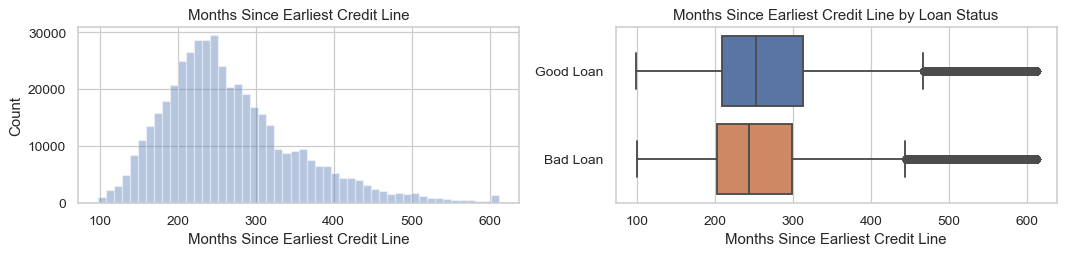

In [87]:
plot_var('mths_since_earliest_cr_line', 'Months Since Earliest Credit Line', continuous=True)

## 4.18 inq_last_6mths

In [88]:
loan_data['inq_last_6mths'].describe()

count    466256.000000
mean          0.804745
std           1.091598
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64

In [89]:
loan_data['inq_last_6mths'].isnull().sum()

29

In [90]:
loan_data['inq_last_6mths'].fillna(0, inplace=True)

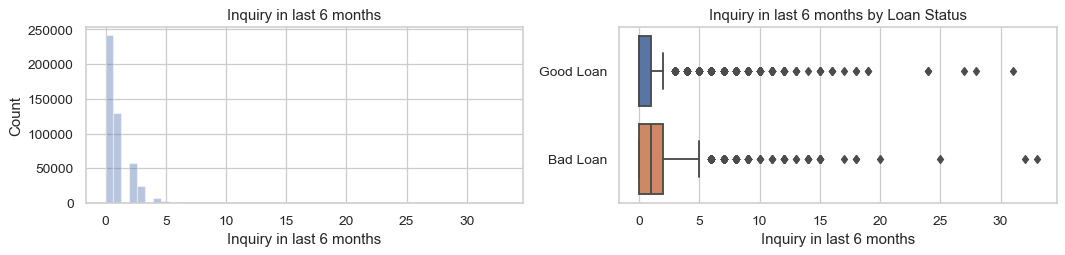

In [91]:
plot_var('inq_last_6mths', 'Inquiry in last 6 months', continuous=True)

## 4.19 open_acc

In [92]:
loan_data['open_acc'].describe()

count    466256.000000
mean         11.187069
std           4.987526
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64

In [93]:
loan_data['open_acc'].isnull().sum()

29

In [94]:
loan_data['open_acc'].fillna(0, inplace=True)

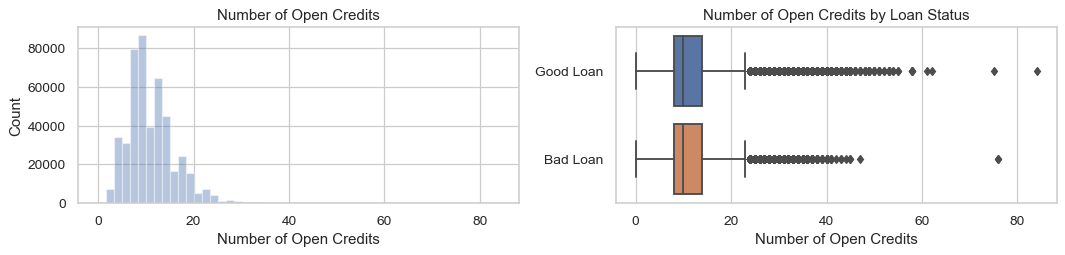

In [95]:
plot_var('open_acc', 'Number of Open Credits', continuous=True)

## 4.20 pub_rec

In [96]:
loan_data['pub_rec'].describe()

count    466256.000000
mean          0.160564
std           0.510863
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64

In [97]:
loan_data['pub_rec'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan,  6.,  9.,  8.,  7., 11., 49.,
       10., 54., 12., 18., 19., 16., 15., 14., 40., 63., 13., 21., 34.,
       17.])

In [98]:
loan_data['pub_rec'].isnull().sum()

29

In [99]:
loan_data['pub_rec'].fillna(loan_data['pub_rec'].mode(), inplace=True)

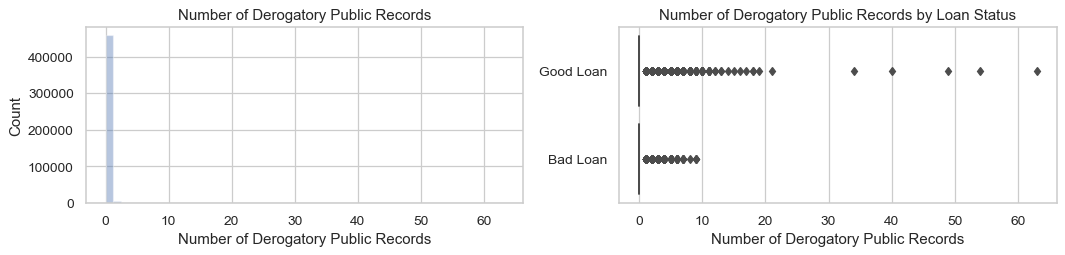

In [100]:
plot_var('pub_rec', 'Number of Derogatory Public Records', continuous=True)

No Variance in data for pub_rec column. Hence this column can be dropped

In [101]:
loan_data.drop(['pub_rec'],axis=1,inplace=True)

## 4.21 revol_bal

In [102]:
loan_data['revol_bal'].describe()

count    4.662850e+05
mean     1.623020e+04
std      2.067625e+04
min      0.000000e+00
25%      6.413000e+03
50%      1.176400e+04
75%      2.033300e+04
max      2.568995e+06
Name: revol_bal, dtype: float64

In [103]:
loan_data['revol_bal'] = loan_data['revol_bal'].apply(lambda x: np.log10(x+1))

In [104]:
loan_data['revol_bal'].isnull().sum()

0

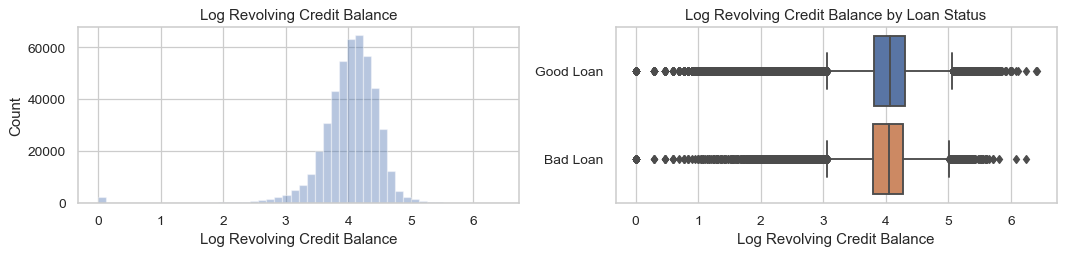

In [105]:
plot_var('revol_bal', 'Log Revolving Credit Balance', continuous=True)

## 4.22 revol_util

In [106]:
loan_data['revol_util'].describe()

count    465945.000000
mean         56.176947
std          23.732628
min           0.000000
25%          39.200000
50%          57.600000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64

In [107]:
loan_data['revol_util'].isnull().sum()

340

In [108]:
loan_data['revol_util'].fillna(0, inplace=True)

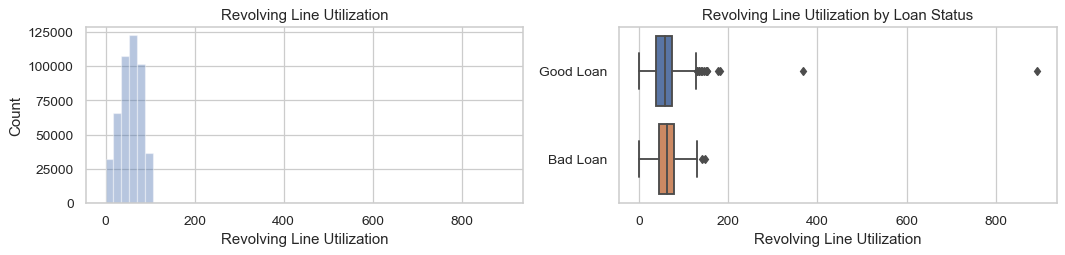

In [109]:
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

## 4.23 total_acc

In [110]:
loan_data['total_acc'].describe()

count    466256.000000
mean         25.064430
std          11.600141
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64

In [111]:
loan_data['total_acc'].isnull().sum()

29

In [112]:
loan_data['total_acc'].fillna(0, inplace=True)

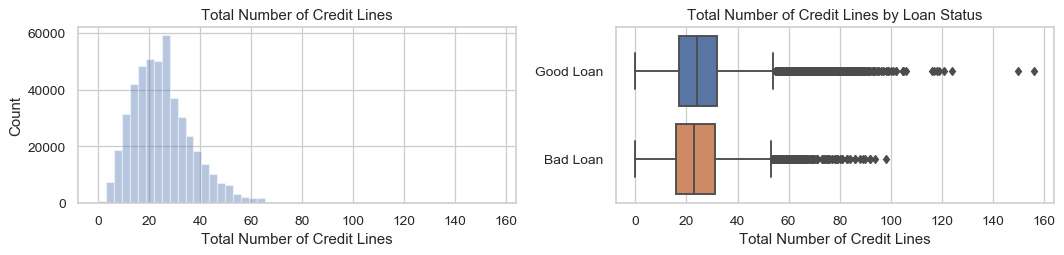

In [113]:
plot_var('total_acc', 'Total Number of Credit Lines', continuous=True)

## 4.24 initial_list_status

In [114]:
loan_data['initial_list_status'].value_counts()

f    303005
w    163280
Name: initial_list_status, dtype: int64

In [115]:
loan_data['initial_list_status'].isnull().sum()

0

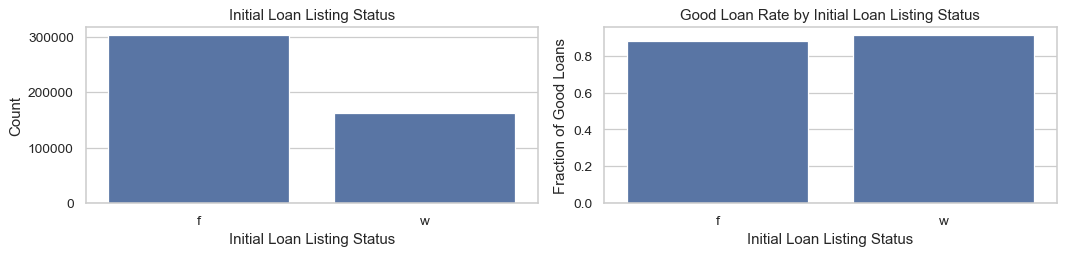

In [116]:
plot_var('initial_list_status', 'Initial Loan Listing Status', continuous=False)

## 4.25 application_type

In [117]:
loan_data['application_type'].value_counts()

INDIVIDUAL    466285
Name: application_type, dtype: int64

All records of same category. Hence dropping this feature

In [118]:
loan_data.drop(['application_type'],axis=1,inplace=True)

## 4.26 acc_now_delinq

In [119]:
loan_data['acc_now_delinq'].value_counts()

0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
5.0         2
Name: acc_now_delinq, dtype: int64

In [120]:
loan_data['acc_now_delinq'].isnull().sum()

29

In [121]:
loan_data['acc_now_delinq'].fillna(loan_data['acc_now_delinq'].mode(), inplace=True)

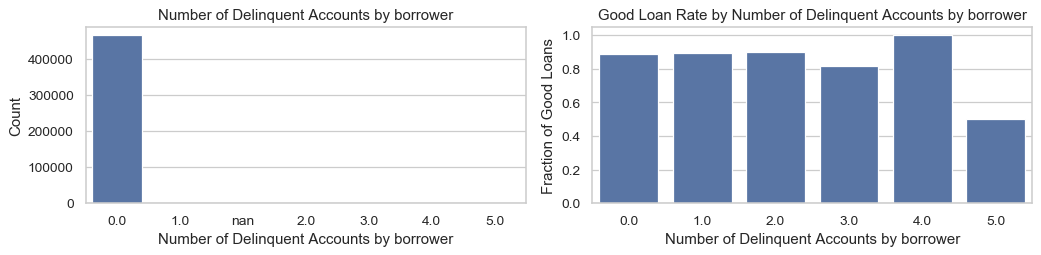

In [122]:
plot_var('acc_now_delinq', 'Number of Delinquent Accounts by borrower', continuous=False)

99% of records corresponds to same category. Hence this feature can be dropped

In [123]:
loan_data.drop(['acc_now_delinq'],axis=1,inplace=True)

## 4.27 total_rev_hi_lim

In [124]:
loan_data['total_rev_hi_lim'].describe()

count    3.960090e+05
mean     3.037909e+04
std      3.724713e+04
min      0.000000e+00
25%      1.350000e+04
50%      2.280000e+04
75%      3.790000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64

In [125]:
loan_data['total_rev_hi_lim'].isnull().sum()

70276

In [126]:
loan_data['total_rev_hi_lim'].fillna(loan_data['total_rev_hi_lim'].mean(), inplace=True)

In [127]:
loan_data['total_rev_hi_lim'] = loan_data['total_rev_hi_lim'].apply(lambda x: np.log10(x+1))

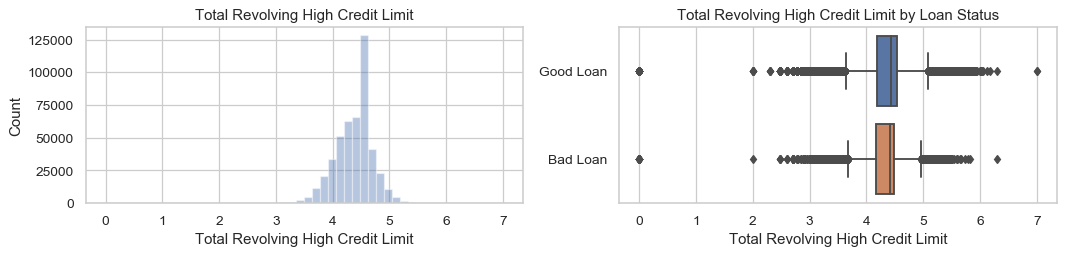

In [128]:
plot_var('total_rev_hi_lim', 'Total Revolving High Credit Limit', continuous=True)

In [129]:
loan_data.sample(2)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_rev_hi_lim,good_bad,mths_since_earliest_cr_line
18350,10000,10000,36,10.37,324.42,B,5.0,RENT,4.778158,Verified,debt_consolidation,CA,3.02,0.0,11.0,3.490941,27.4,15.0,f,4.482589,Bad Loan,186.0
267274,21000,21000,36,7.69,655.07,A,1.0,RENT,4.954247,Verified,debt_consolidation,CA,17.74,1.0,21.0,4.519657,65.1,35.0,w,4.705872,Good Loan,204.0


# 5. Feature Engineering

## 5.1 Converting Target Column to 1-0 indicator

In [130]:
loan_data['good_bad'] = np.where(loan_data['good_bad'].isin(['Good Loan']), 1, 0)

In [132]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

## 5.2 Creating Dummy Variables

In [133]:
loan_data = pd.get_dummies(loan_data, columns=['grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 
                                       'initial_list_status'], drop_first=True)

In [134]:
loan_data.sample(2)

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_rev_hi_lim,good_bad,mths_since_earliest_cr_line,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
293580,2600,2600,36,11.67,85.95,7.0,4.397957,16.32,0.0,10.0,3.528531,36.3,11.0,3.968530,1,144.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
306944,18900,18900,36,10.99,618.68,0.0,4.623260,20.63,0.0,9.0,4.507370,61.6,21.0,4.717679,1,241.0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [135]:
loan_data = loan_data.sample(100000,random_state=1)

## 5.3 Train Test Split

In [206]:
X_train, X_test, y_train, y_test = train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'],
                                                    test_size=0.15,random_state=101)

In [207]:
y_train.value_counts()

1    75656
0     9344
Name: good_bad, dtype: int64

## 5.4 SMOTE to balance the dataset

In [138]:
sm = SMOTE(random_state=12)
x_train_r, y_train_r = sm.fit_sample(X_train, y_train)

In [139]:
y_train_r.value_counts()

1    75656
0    75656
Name: good_bad, dtype: int64

## 5.5 Undersampling the majority class

In [140]:
nondefaults = loan_data[loan_data['good_bad'] == 1]
defaults = loan_data[loan_data['good_bad'] == 0]

In [141]:
nondefaults_under = nondefaults.sample(defaults.shape[0])

In [142]:
loan_data_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

loan_data_under.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_rev_hi_lim,good_bad,mths_since_earliest_cr_line,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,17800,17800,60,11.49,391.38,2.0,4.875067,17.41,0.0,11.0,4.094681,17.9,28.0,4.482589,1,285.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14400,14400,36,10.99,471.37,10.0,4.819551,21.25,2.0,10.0,4.325434,66.7,22.0,4.501073,1,185.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16000,16000,60,11.99,355.84,5.0,4.748196,17.27,0.0,7.0,4.418947,72.8,25.0,4.482589,1,258.0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3600,3600,36,11.99,119.56,0.0,4.176120,10.72,0.0,9.0,3.666237,34.9,33.0,4.123884,1,316.0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6075,6075,36,15.31,211.52,0.0,4.875067,6.83,2.0,5.0,3.366796,66.0,20.0,3.550351,1,319.0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [143]:
loan_data_under['good_bad'].value_counts()

1    11009
0    11009
Name: good_bad, dtype: int64

In [144]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(loan_data_under.drop('good_bad',axis=1),loan_data_under['good_bad'],
                                                    test_size=0.15,random_state=101,stratify=loan_data_under['good_bad'])

# 6. Model Training & Testing

## 6.1 Base Logistic Regression on SMOTE Dataset

In [146]:
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', LogisticRegression(random_state=1))
])

In [147]:
pipeline_logreg.fit(x_train_r,y_train_r)

Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                ('model', LogisticRegression(random_state=1))])

In [148]:
score = pipeline_logreg.score(X_test,y_test)
print('Base Logistic Regression Test Accuracy : %.3f' %score)

Base Logistic Regression Test Accuracy : 0.882


In [149]:
predictions = pipeline_logreg.predict(X_test)

In [150]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[   22  1643]
 [  122 13213]]


In [151]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

Accuracy: 0.882333
Precision: 0.889405
Recall: 0.990851
F1 score: 0.937391


ROC AUC=0.644


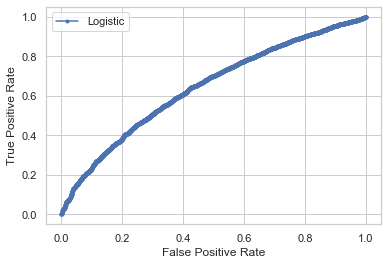

In [152]:
# predict probabilities
lr_probs = pipeline_logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('ROC AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## 6.2 Base Logistic Regression on Undersampled Dataset

In [153]:
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', LogisticRegression(random_state=1))
])

In [154]:
pipeline_logreg.fit(X_train_u,y_train_u)

Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                ('model', LogisticRegression(random_state=1))])

In [155]:
score = pipeline_logreg.score(X_test_u,y_test_u)
print('Base Logistic Regression Test Accuracy : %.3f' %score)

Base Logistic Regression Test Accuracy : 0.637


In [156]:
predictions = pipeline_logreg.predict(X_test_u)

In [157]:
confusion_matrix = metrics.confusion_matrix(y_test_u, predictions)
print(confusion_matrix)

[[1085  566]
 [ 633 1019]]


In [158]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_u, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_u, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_u, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_u, predictions)
print('F1 score: %f' % f1)

Accuracy: 0.636997
Precision: 0.642902
Recall: 0.616828
F1 score: 0.629595


## 6.3 Tuned Logistic Regression on SMOTE Dataset

In [208]:
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', LogisticRegression(random_state=1))
])

In [209]:
param_grid_logreg = {
    'model__C': [0.001,0.01,0.1,1,10,100],
    'model__penalty': ['l1', 'l2']
}

In [210]:
cv_grid_logreg = GridSearchCV(estimator=pipeline_logreg, param_grid=param_grid_logreg, scoring='roc_auc', 
                              n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [211]:
cv_grid_logreg.fit(x_train_r, y_train_r)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [212]:
cv_grid_logreg.best_score_

0.9446002214478879

In [213]:
cv_grid_logreg.best_params_

{'model__C': 0.001, 'model__penalty': 'l2'}

In [214]:
score = cv_grid_logreg.score(X_test,y_test)
print('Tuned Logistic Regression Test Accuracy : %.3f' %score)

Tuned Logistic Regression Test Accuracy : 0.634


In [215]:
predictions = cv_grid_logreg.predict(X_test)

In [216]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[   15  1650]
 [   89 13246]]


In [217]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

Accuracy: 0.884067
Precision: 0.889232
Recall: 0.993326
F1 score: 0.938401


ROC AUC=0.634


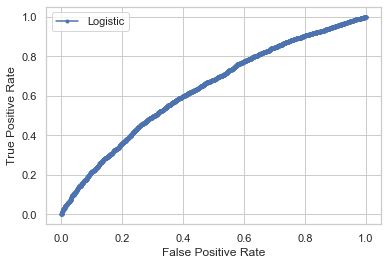

In [218]:
# predict probabilities
lr_probs = cv_grid_logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('ROC AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [219]:
X_test.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_rev_hi_lim,mths_since_earliest_cr_line,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
20769,9600,9600,60,10.74,207.49,4.0,4.518527,17.24,1.0,16.0,4.082354,39.0,40.0,4.482589,294.0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195875,20000,20000,36,16.29,706.01,0.0,4.755882,26.46,2.0,13.0,3.867350,67.0,23.0,4.041432,175.0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
187249,11100,11100,36,15.31,386.48,3.0,4.653222,22.83,2.0,10.0,3.748266,58.3,52.0,3.982316,206.0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78592,23000,23000,36,6.97,709.86,10.0,5.021193,16.85,0.0,21.0,4.434313,27.2,47.0,4.999135,326.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
190386,7000,7000,36,13.11,236.23,0.0,4.660845,23.79,2.0,10.0,3.677151,52.8,29.0,3.954291,211.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [220]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [222]:
X_test['predictions'] = predictions
#X_test.to_csv('Predicted_Output.csv')

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_rev_hi_lim,good_bad,mths_since_earliest_cr_line,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
345847,24000,24000,60,16.29,587.34,10.0,4.875067,19.45,1.0,4.0,3.805705,91.3,14.0,3.845160,1,377.0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
422411,15000,15000,36,13.65,510.12,10.0,4.939025,17.06,0.0,9.0,4.001777,59.8,27.0,4.225335,1,337.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131614,24000,24000,60,23.76,687.10,10.0,4.812920,17.11,5.0,18.0,3.798236,61.6,46.0,4.008643,1,245.0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1616,24000,24000,60,12.69,542.28,10.0,5.342425,8.05,1.0,11.0,4.733037,41.2,28.0,4.482589,0,250.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
251723,9000,9000,36,14.31,308.96,7.0,4.720168,13.01,1.0,7.0,3.949292,66.4,12.0,4.127137,1,405.0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 6.4 Tuned Logistic Regression on Undersampled Dataset

In [ ]:
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', LogisticRegression(random_state=1))
])

In [ ]:
param_grid_logreg = {
    'model__C': [0.001,0.01,0.1,1,10,100],
    'model__penalty': ['l1', 'l2']
}

In [ ]:
cv_grid_logreg = GridSearchCV(estimator=pipeline_logreg, param_grid=param_grid_logreg, scoring='roc_auc', 
                              n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [ ]:
cv_grid_logreg.fit(X_train_u, y_train_u)

In [ ]:
cv_grid_logreg.best_score_

In [ ]:
cv_grid_logreg.best_params_

In [ ]:
score = cv_grid_logreg.score(X_test_u,y_test_u)
print('Tuned Logistic Regression Test Accuracy : %.3f' %score)

In [ ]:
predictions = cv_grid_logreg.predict(X_test_u)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_u, predictions)
print(confusion_matrix)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_u, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_u, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_u, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_u, predictions)
print('F1 score: %f' % f1)

## 6.3 Logistic Regression with Stochastic Gradient Descent (SGD) on SMOTE Dataset

In [ ]:
pipeline_sgdlogreg = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [ ]:
param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1],
    'model__penalty': ['l1', 'l2']
}

In [ ]:
cv_grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', 
                              n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [ ]:
cv_grid_sgdlogreg.fit(X_train, y_train)

In [ ]:
cv_grid_sgdlogreg.best_score_

In [ ]:
cv_grid_sgdlogreg.best_params_

In [ ]:
score = cv_grid_sgdlogreg.score(X_test,y_test)
print('Tuned Logistic Regression SGD Test Accuracy : %.3f' %score)

In [ ]:
predictions = cv_grid_sgdlogreg.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

In [ ]:
# predict probabilities
lr_probs = cv_grid_sgdlogreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('ROC AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## 6.4 Logistic Regression with Stochastic Gradient Descent (SGD) on Undersampled Data

In [ ]:
pipeline_sgdlogreg = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [ ]:
param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1],
    'model__penalty': ['l1', 'l2']
}

In [ ]:
cv_grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, 
                              n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [ ]:
cv_grid_sgdlogreg.fit(X_train_u, y_train_u)

In [ ]:
cv_grid_sgdlogreg.best_score_

In [ ]:
cv_grid_sgdlogreg.best_params_

In [ ]:
score = cv_grid_sgdlogreg.score(X_test_u,y_test_u)
print('Tuned Logistic Regression SGD Test Accuracy : %.3f' %score)

In [ ]:
predictions = cv_grid_sgdlogreg.predict(X_test_u)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_u, predictions)
print(confusion_matrix)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_u, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_u, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_u, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_u, predictions)
print('F1 score: %f' % f1)

## 6.5 Base Random Forest on SMOTE Dataset

In [ ]:
pipeline_rfc = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [ ]:
pipeline_rfc.fit(x_train_r,y_train_r)

In [ ]:
score = pipeline_rfc.score(X_test,y_test)
print('Base Random Forest Test Accuracy : %.3f' %score)

In [ ]:
predictions = pipeline_rfc.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

## 6.6 Base Random Forest on Undersampled Dataset

In [ ]:
pipeline_rfc = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [ ]:
pipeline_rfc.fit(X_train_u,y_train_u)

In [ ]:
score = pipeline_rfc.score(X_test_u,y_test_u)
print('Base Random Forest Test Accuracy : %.3f' %score)

In [ ]:
predictions = pipeline_rfc.predict(X_test_u)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_u, predictions)
print(confusion_matrix)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_u, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_u, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_u, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_u, predictions)
print('F1 score: %f' % f1)

## 6.7 Tuned Random Forest on SMOTE Data

In [ ]:
pipeline_rfc = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [ ]:
param_grid_rfc = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [2, 5, 10, 15],
    'model__max_features': [4, 8, 14]
}

In [ ]:
grid_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=-1, 
                        pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [ ]:
grid_rfc.fit(x_train_r, y_train_r)

In [ ]:
score = grid_rfc.score(X_test,y_test)
print('Base Random Forest Test Accuracy : %.3f' %score)

In [ ]:
predictions = grid_rfc.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

## 6.8 Base XGBoost on SMOTE Dataset

In [ ]:
pipeline_xgb = Pipeline([
    ('model', xgb.XGBClassifier())
])

In [ ]:
pipeline_xgb.fit(x_train_r,y_train_r)

In [ ]:
score = pipeline_xgb.score(X_test,y_test)
print('Base XGBoost Test Accuracy : %.3f' %score)

In [ ]:
predictions = pipeline_xgb.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

## 6.9 Tuned XGBoost on SMOTE Dataset

In [ ]:
pipeline_xgb = Pipeline([
    ('model', xgb.XGBClassifier())
])

In [ ]:
param_grid_xgb = {
    'model__learning_rate': [0.1],
    'model__n_estimators': [5,30,100],
    'model__min_child_weight': [7,8,10],
    'model__max_depth': [6,8],
    'model__subsample': [ 0.7,0.9]
}

In [ ]:
grid_xgb = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid_xgb, scoring='roc_auc', n_jobs=-1, 
                        pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [ ]:
grid_xgb.fit(x_train_r, y_train_r)

In [ ]:
score = grid_xgb.score(X_test,y_test)
print('Tuned XGBoost Test Accuracy : %.3f' %score)

In [ ]:
predictions = grid_xgb.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

## 6.10 Base XGBoost on Undersampled Dataset

In [ ]:
pipeline_xgb = Pipeline([
    ('model', xgb.XGBClassifier())
])

In [ ]:
pipeline_xgb.fit(X_train_u,y_train_u)

In [ ]:
score = pipeline_xgb.score(X_test_u,y_test_u)
print('Base XGBoost Test Accuracy : %.3f' %score)

In [ ]:
predictions = pipeline_xgb.predict(X_test_u)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_u, predictions)
print(confusion_matrix)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_u, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_u, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_u, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_u, predictions)
print('F1 score: %f' % f1)

## 6.11 Base Gradient Boost on SMOTE Dataset

In [141]:
pipeline_gb = Pipeline([
    ('model', GradientBoostingClassifier(random_state=1))
])

In [158]:
pipeline_gb.fit(x_train_r,y_train_r)

Pipeline(steps=[('model', GradientBoostingClassifier(random_state=1))])

In [159]:
score = pipeline_gb.score(X_test,y_test)
print('Base XGBoost Test Accuracy : %.3f' %score)

Base XGBoost Test Accuracy : 0.863


In [160]:
predictions = pipeline_gb.predict(X_test)

In [161]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[  152  1513]
 [  547 12788]]


In [162]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

Accuracy: 0.862667
Precision: 0.894203
Recall: 0.958980
F1 score: 0.925460


In [163]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5251357093876778

## 6.12 Tuned Gradient Boost on SMOTE Dataset

In [171]:
pipeline_gb = Pipeline([
    ('model', GradientBoostingClassifier(random_state=1))
])

In [172]:
param_grid_gb = {
    'model__learning_rate': [0.1],
    'model__n_estimators': [5,30,100],
    'model__min_samples_split': [100,200,300],
    'model__min_samples_leaf': [50]
}

In [173]:
# learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# train_results = []
# test_results = []
# for eta in learning_rates:
#    model = GradientBoostingClassifier(learning_rate=eta)
#    model.fit(x_train_r, y_train_r)
#    train_pred = model.predict(x_train_r)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_r, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = model.predict(X_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
# line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('AUC score')
# plt.xlabel('learning rate')
# plt.show()

In [174]:
grid_gb = GridSearchCV(estimator=pipeline_gb, param_grid=param_grid_gb, scoring='roc_auc', n_jobs=-1, 
                        pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [175]:
grid_gb.fit(x_train_r, y_train_r)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 10.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        GradientBoostingClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1],
                         'model__min_samples_leaf': [50],
                         'model__min_samples_split': [100, 200, 300],
                         'model__n_estimators': [5, 30, 100]},
             scoring='roc_auc', verbose=1)

In [176]:
score = grid_gb.score(X_test,y_test)
print('Base XGBoost Test Accuracy : %.3f' %score)

Base XGBoost Test Accuracy : 0.624


In [180]:
predictions = grid_gb.predict(X_test)

In [181]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[  142  1523]
 [  533 12802]]


In [182]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

Accuracy: 0.862933
Precision: 0.893682
Recall: 0.960030
F1 score: 0.925669


## 6.13 Base SVM on SMOTE Dataset

In [184]:
pipeline_svm = Pipeline([
    ('model', SVC(random_state=1))
])

In [185]:
pipeline_svm.fit(x_train_r,y_train_r)

Pipeline(steps=[('model', SVC(random_state=1))])

In [186]:
score = pipeline_svm.score(X_test,y_test)
print('Base XGBoost Test Accuracy : %.3f' %score)

Base XGBoost Test Accuracy : 0.622


In [188]:
predictions = pipeline_svm.predict(X_test)

In [189]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

Accuracy: 0.622133
Precision: 0.892736
Recall: 0.653468
F1 score: 0.754590
